In [157]:
import ecmwf.data as ecdata
from magpye import GeoMap
from ecmwf.opendata import Client
from pylab import *
from inspect import signature

In [2]:
data = ecdata.read("20220722000000-162h-oper-fc.grib2")


In [3]:
data.describe()


parameter,typeOfLevel,level,date,time,step,number,paramId,class,stream,type,experimentVersionNumber
10u,heightAboveGround,10,20220722,0,162,None,165,od,oper,fc,0001
10v,heightAboveGround,10,20220722,0,162,None,166,od,oper,fc,0001
2t,heightAboveGround,2,20220722,0,162,None,167,od,oper,fc,0001
d,isobaricInhPa,"50,200,...",20220722,0,162,None,155,od,oper,fc,0001
gh,isobaricInhPa,"50,200,...",20220722,0,162,None,156,od,oper,fc,0001
msl,meanSea,0,20220722,0,162,None,151,od,oper,fc,0001
q,isobaricInhPa,"50,200,...",20220722,0,162,None,133,od,oper,fc,0001
r,isobaricInhPa,"50,200,...",20220722,0,162,None,157,od,oper,fc,0001
ro,surface,0,20220722,0,162,None,205,od,oper,fc,0001
skt,surface,0,20220722,0,162,None,235,od,oper,fc,0001


In [4]:
data.ls()


,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
Message,,,,,,,,,,
0,ecmf,r,isobaricInhPa,300,20220722,0,162,fc,None,regular_ll
1,ecmf,tcwv,entireAtmosphere,0,20220722,0,162,fc,None,regular_ll
2,ecmf,q,isobaricInhPa,700,20220722,0,162,fc,None,regular_ll
3,ecmf,st,depthBelowLandLayer,0,20220722,0,162,fc,None,regular_ll
4,ecmf,skt,surface,0,20220722,0,162,fc,None,regular_ll
5,ecmf,gh,isobaricInhPa,200,20220722,0,162,fc,None,regular_ll
6,ecmf,q,isobaricInhPa,850,20220722,0,162,fc,None,regular_ll
7,ecmf,gh,isobaricInhPa,50,20220722,0,162,fc,None,regular_ll
8,ecmf,v,isobaricInhPa,50,20220722,0,162,fc,None,regular_ll


In [5]:
u = data.select(shortName='u')

In [6]:
v = data.select(shortName='v')

In [169]:
u.describe()

parameter,typeOfLevel,level,date,time,step,number,paramId,class,stream,type,experimentVersionNumber
u,isobaricInhPa,"50,200,...",20220722,0,162,None,131,od,oper,fc,0001


In [21]:
data.describe('u')

shortName,u
name,U component of wind
paramId,131
units,m s**-1
typeOfLevel,isobaricInhPa
level,"50,200,250,300,500,700,850,925,1000"
date,20220722
time,0
step,162
number,None
class,od


In [163]:
u.describe()

parameter,typeOfLevel,level,date,time,step,number,paramId,class,stream,type,experimentVersionNumber
u,isobaricInhPa,"50,200,...",20220722,0,162,None,131,od,oper,fc,0001


In [187]:
u_srfc = data.select(shortName = 'u',level=[1000])
v_srfc = data.select(shortName = 'v',level=[1000])
u_srfc.ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
Message,,,,,,,,,,
0,ecmf,u,isobaricInhPa,1000,20220722,0,162,fc,None,regular_ll


In [168]:
u_srfc.values()

array([-8.91390991, -8.91390991, -8.91390991, ...,  5.64859009,
        5.64859009,  5.64859009])

In [181]:
len(data.select(shortName = 'v',level=[50]).values())

405900

In [31]:
len(u_srfc.values())

405900

In [193]:
# get latitudes and longitudes as numpy arrays
lats = u_srfc.latitudes()
lons = u_srfc.longitudes()
(lats, lons)

(array([ 90.,  90.,  90., ..., -90., -90., -90.]),
 array([-180. , -179.6, -179.2, ...,  178.8,  179.2,  179.6]))

In [123]:
lats_ind_ro = [i for i in range(len(lats)) if lats[i]>40 and lats[i]<50]
lons_ind_ro = [i for i in range(len(lons)) if lons[i]>20 and lons[i]<30]
(lats_ind_ro,lons_ind_ro);
##lats contains dublicates

In [107]:
u_srfc.values()[lats_ind_ro]

array([8.14859009, 7.25796509, 6.82046509, ..., 6.92984009, 7.22671509,
       7.47671509])

In [118]:
lats[lats_ind_ro]

array([50. , 50. , 50. , ..., 40.4, 40.4, 40.4])

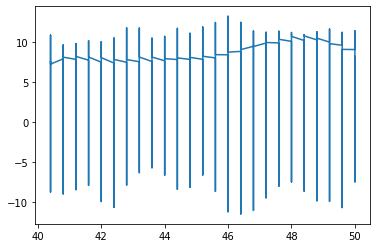

In [122]:
#lats contains dublicates
plot(lats[lats_ind_ro],u_srfc.values()[lats_ind_ro])
#u component against Romania latitude at surface level

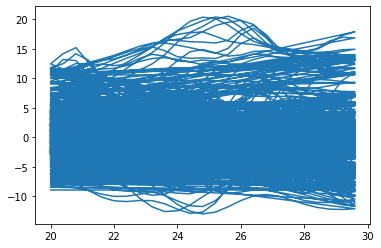

In [124]:
plot(lons[lons_ind_ro],u_srfc.values()[lons_ind_ro])

In [137]:
len(unique(u_srfc.values()))

2890

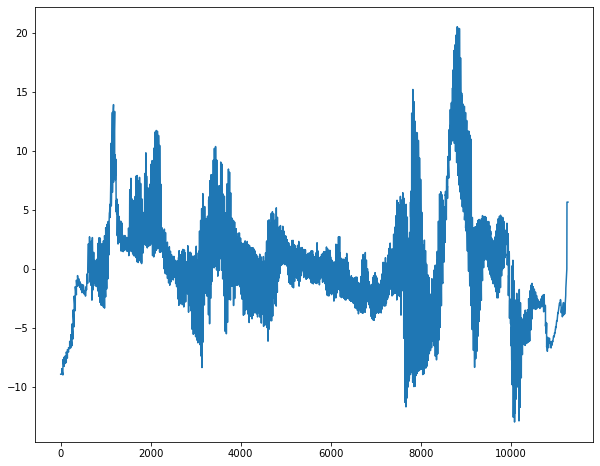

In [219]:
plot(u_srfc.values()[lons_ind_ro])
matplotlib.rcParams['figure.figsize'] = [15, 8]

In [214]:
list(lons)

[-180.0,
 -179.6,
 -179.2,
 -178.79999999999998,
 -178.39999999999998,
 -177.99999999999997,
 -177.59999999999997,
 -177.19999999999996,
 -176.79999999999995,
 -176.39999999999995,
 -175.99999999999994,
 -175.59999999999994,
 -175.19999999999993,
 -174.79999999999993,
 -174.39999999999992,
 -173.99999999999991,
 -173.5999999999999,
 -173.1999999999999,
 -172.7999999999999,
 -172.3999999999999,
 -171.9999999999999,
 -171.59999999999988,
 -171.19999999999987,
 -170.79999999999987,
 -170.39999999999986,
 -169.99999999999986,
 -169.59999999999985,
 -169.19999999999985,
 -168.79999999999984,
 -168.39999999999984,
 -167.99999999999983,
 -167.59999999999982,
 -167.19999999999982,
 -166.7999999999998,
 -166.3999999999998,
 -165.9999999999998,
 -165.5999999999998,
 -165.1999999999998,
 -164.79999999999978,
 -164.39999999999978,
 -163.99999999999977,
 -163.59999999999977,
 -163.19999999999976,
 -162.79999999999976,
 -162.39999999999975,
 -161.99999999999974,
 -161.59999999999974,
 -161.199999999

In [212]:
f = open("lons.txt", "a")
f.write(str(list(lons[:1801])))
f.close()

In [14]:
fig = GeoMap(area_name='europe')
fig.coastlines(resolution="medium")
fig.gridlines()

In [63]:
fig.arrows(u=u_srfc, v=v_srfc, wind_style="arrows", density=2, colour='black')

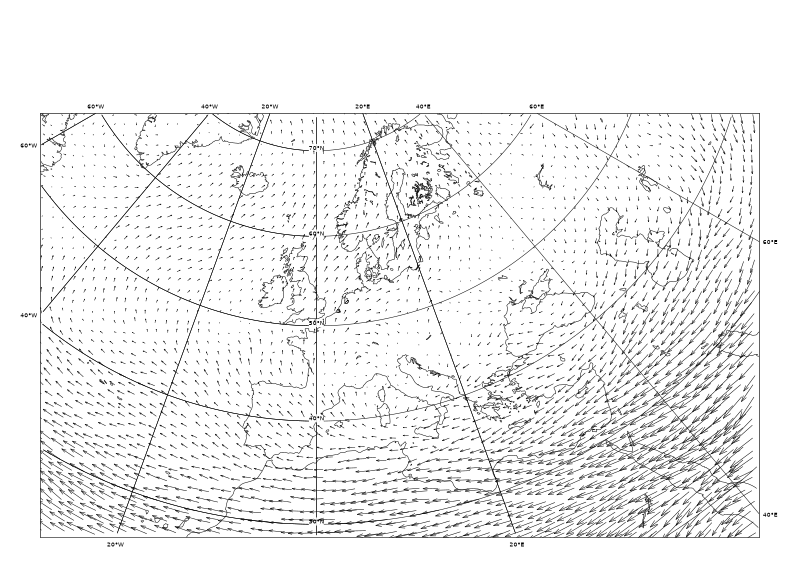

In [16]:
fig.show()